In [6]:
!pip install openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 495.5 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/250.9 kB 495.5 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/250.9 kB 930.9 kB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\renas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Ejercicio 1

In [7]:
datos = pd.read_excel('wind_data.xlsx')
print(datos)

       dia  regional wind  wind gap norte sur
0        1       8.000000            0.000000
1        2       8.346296            0.181523
2        3      10.062316            0.188643
3        4      10.791337            0.071085
4        5      10.754093            0.078442
...    ...            ...                 ...
3645  3646       8.642231           -0.869425
3646  3647       6.527408           -1.268447
3647  3648       6.230707           -1.149234
3648  3649       5.550882           -0.420431
3649  3650       6.545450            0.250088

[3650 rows x 3 columns]


In [8]:
datos['wind dif'] = datos['regional wind'] - datos['regional wind'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif
0        1       8.000000            0.000000       NaN
1        2       8.346296            0.181523  0.346296
2        3      10.062316            0.188643  1.716019
3        4      10.791337            0.071085  0.729021
4        5      10.754093            0.078442 -0.037244
...    ...            ...                 ...       ...
3645  3646       8.642231           -0.869425  0.940298
3646  3647       6.527408           -1.268447 -2.114824
3647  3648       6.230707           -1.149234 -0.296701
3648  3649       5.550882           -0.420431 -0.679825
3649  3650       6.545450            0.250088  0.994568

[3650 rows x 4 columns]


In [10]:
datos_filtrados = datos.dropna(subset=['wind dif'])

slope, intercept, r_value, p_value, std_err = stats.linregress(datos_filtrados['dia'], datos_filtrados['wind dif'])

beta_1 = slope
beta_0 = intercept

print('beta_0:', beta_0)
print('beta_1:', beta_1)

beta_0: -0.0025521648822296457
beta_1: 1.1793804766925424e-06


In [11]:
kappa = -365 * beta_1 #PREGUNTAR SI ES MENOS O MÁS
print('kappa:', kappa)

kappa: -0.00043047387399277795


In [13]:
Y_pred = beta_0 + beta_1 * datos_filtrados['dia']

residuo = datos_filtrados['wind dif'] - Y_pred

sigma = np.std(residuo)
sigma

0.9109624264797362

In [14]:
datos['gap dif'] = datos['wind gap norte sur'] - datos['wind gap norte sur'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif   gap dif
0        1       8.000000            0.000000       NaN       NaN
1        2       8.346296            0.181523  0.346296  0.181523
2        3      10.062316            0.188643  1.716019  0.007120
3        4      10.791337            0.071085  0.729021 -0.117558
4        5      10.754093            0.078442 -0.037244  0.007358
...    ...            ...                 ...       ...       ...
3645  3646       8.642231           -0.869425  0.940298  0.185931
3646  3647       6.527408           -1.268447 -2.114824 -0.399021
3647  3648       6.230707           -1.149234 -0.296701  0.119213
3648  3649       5.550882           -0.420431 -0.679825  0.728803
3649  3650       6.545450            0.250088  0.994568  0.670518

[3650 rows x 5 columns]


In [15]:
datos_filtrados_gap = datos.dropna(subset=['gap dif'])

slope_gap, intercept_gap, r_value_gap, p_value_gap, std_err_gap = stats.linregress(datos_filtrados_gap['dia'], datos_filtrados_gap['gap dif'])

beta_1_gap = slope_gap
beta_0_gap = intercept_gap

print('beta_0:', beta_0_gap)
print('beta_1:', beta_1_gap)

beta_0: -8.66216028202762e-05
beta_1: 8.497127690939322e-08


In [16]:
beta = -365 * beta_1_gap
beta

-3.101451607192852e-05

In [17]:
D_pred = beta_0_gap + beta_1_gap * datos_filtrados['dia']

residuo_gap = datos_filtrados_gap['gap dif'] - D_pred

gamma = np.std(residuo_gap)
gamma

0.5465935050937148

## Ejercicio 2

In [18]:
def theta(t):
    return 6 + 2 * np.cos(2 * np.pi * t / 365)

In [26]:
def simulacion ():
    caminos_S = []
    caminos_D = []

    for m in range(1000):
        S = np.zeros(365)
        D = np.zeros(365)

        # Valores iniciales (suponemos que S_0 y D_0 son conocidos o se dan como 0)
        S[0] = np.mean(datos['regional wind'])
        D[0] = 0

        for i in range(1, 365):
            S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
            
            D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)

        caminos_S.append(S)
        caminos_D.append(D)
    return caminos_S, caminos_D

In [27]:
simulacion

<function __main__.simulacion()>

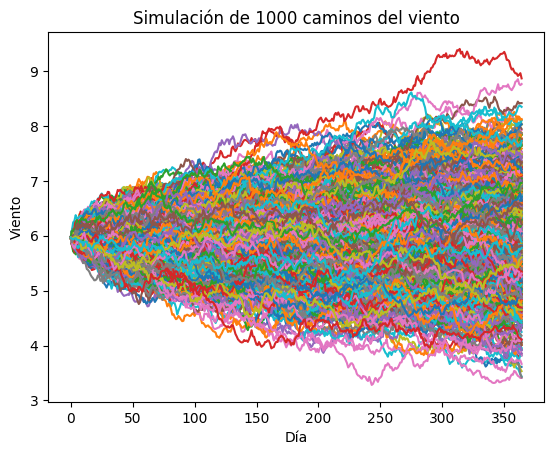

In [29]:
for i in range(1000):
    plt.plot(caminos_S[i])

plt.title('Simulación de 1000 caminos del viento')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()
#PREGUNTAR LO DEL GEOMETRIC WALK

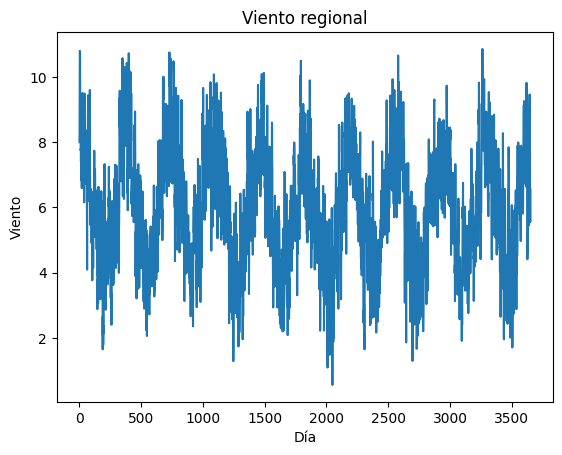

In [21]:
plt.plot(datos['dia'], datos['regional wind'])
plt.title('Viento regional')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

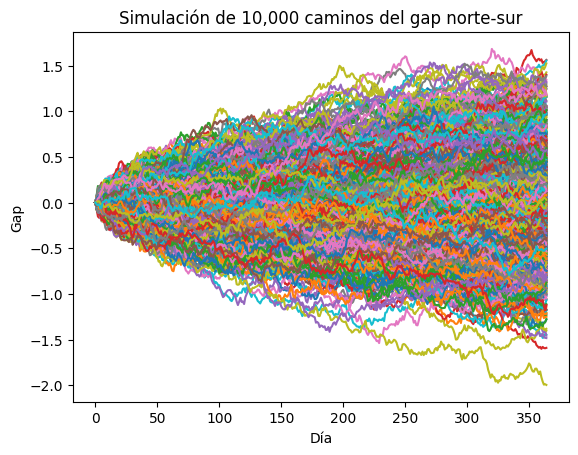

In [22]:
for i in range(1000):
    plt.plot(caminos_D[i])
plt.title('Simulación de 10,000 caminos del gap norte-sur')
plt.xlabel('Día')
plt.ylabel('Gap')
plt.show()

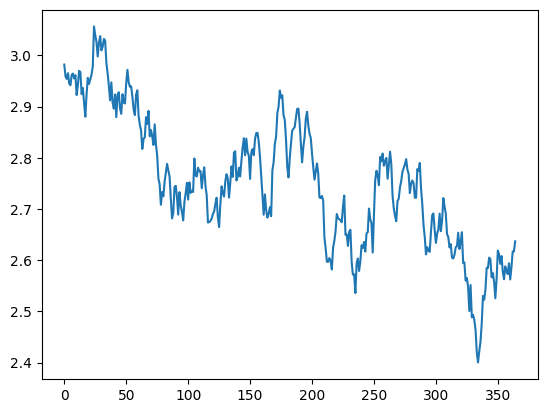

In [23]:
#Viento en molino norte
S_norte = (S+D)/2

plt.plot(S_norte)
plt.show()

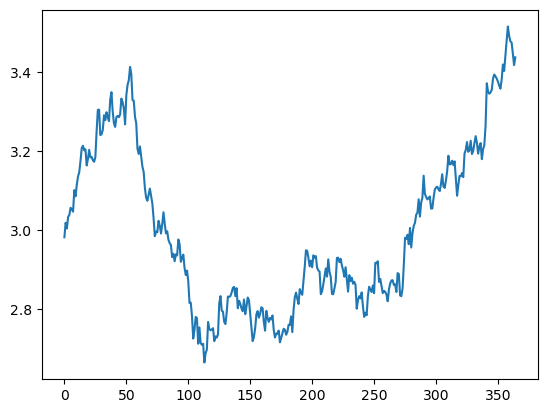

In [ ]:
S_sur = (S-D)/2

plt.plot(S_sur)
plt.show()

Media del viento simulado: 5.630985543358342
Desviación estándar del viento simulado: 0.17780234244298299
Media del viento histórico: 5.964442822277723
Desviación estándar del viento histórico: 1.8032133987250798
Media de la diferencia simulada: -0.12730462907989978
Desviación estándar de la diferencia simulada: 0.2418631904854909
Media de la diferencia histórica: -0.0003986161317890626
Desviación estándar de la diferencia histórica: 0.9109632735972379


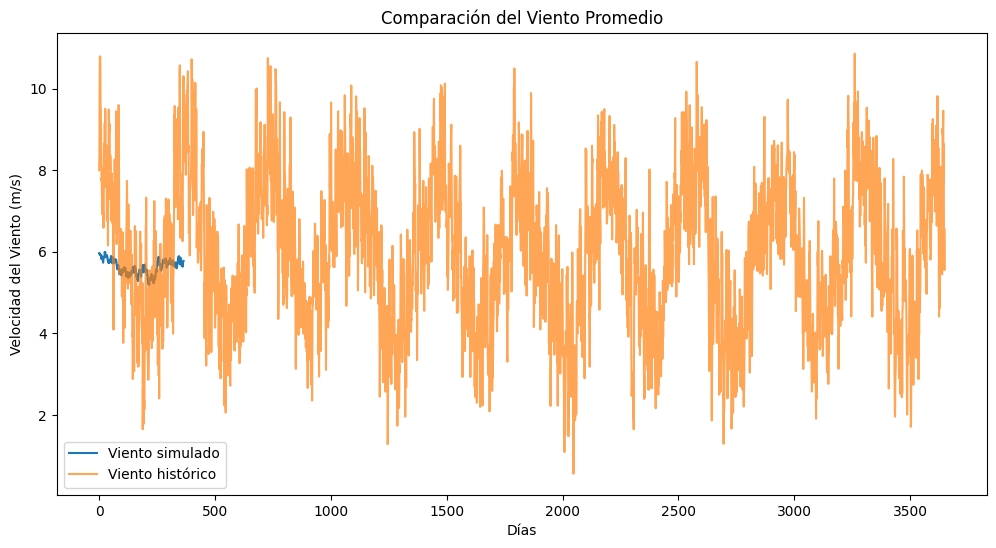

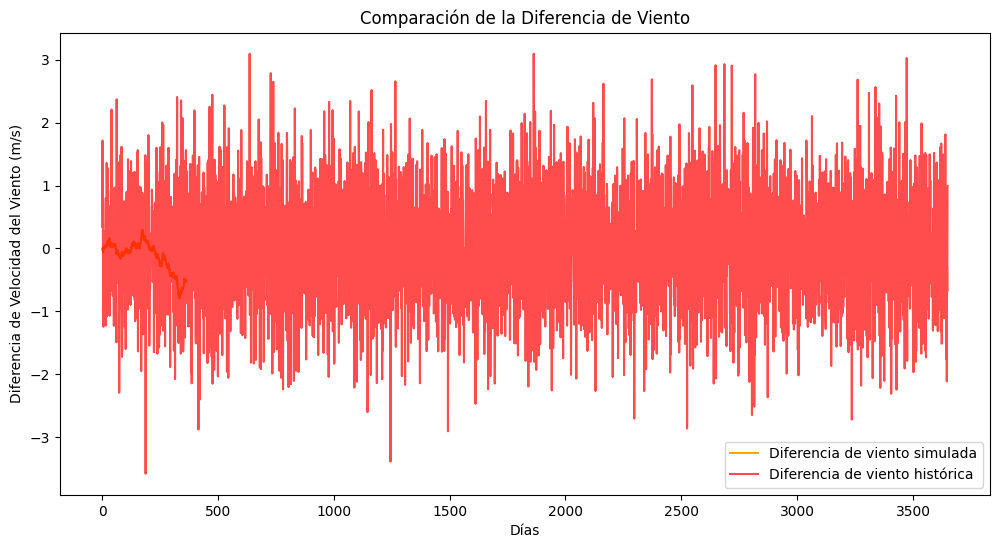

In [24]:
# Supongamos que tienes datos históricos de 'wind' y 'wind dif'
historical_wind = datos['regional wind']  # Reemplaza con la columna correcta
historical_wind_dif = datos['wind dif']

# Comparación de la media y desviación estándar
print(f"Media del viento simulado: {np.mean(S)}")
print(f"Desviación estándar del viento simulado: {np.std(S)}")
print(f"Media del viento histórico: {np.mean(historical_wind)}")
print(f"Desviación estándar del viento histórico: {np.std(historical_wind)}")

# Similar para la diferencia de viento
print(f"Media de la diferencia simulada: {np.mean(D)}")
print(f"Desviación estándar de la diferencia simulada: {np.std(D)}")
print(f"Media de la diferencia histórica: {np.mean(historical_wind_dif)}")
print(f"Desviación estándar de la diferencia histórica: {np.std(historical_wind_dif)}")

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(S, label='Viento simulado')
plt.plot(historical_wind, label='Viento histórico', alpha=0.7)
plt.title('Comparación del Viento Promedio')
plt.xlabel('Días')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(D, label='Diferencia de viento simulada', color='orange')
plt.plot(historical_wind_dif, label='Diferencia de viento histórica', color='red', alpha=0.7)
plt.title('Comparación de la Diferencia de Viento')
plt.xlabel('Días')
plt.ylabel('Diferencia de Velocidad del Viento (m/s)')
plt.legend()
plt.show()


## Ejercicio 3


In [53]:
# Definición de variables iniciales
K = np.mean(datos['regional wind'])  # Umbral de apagado/encendido
n_days = 365
r = 0.05  # Tasa de interés anual para el descuento de cashflows

# Inicialización de listas para almacenar resultados
caminos_S = []
caminos_D = []
cashflows_totales = []

for m in range(1000):  # 1000 simulaciones
    S = np.zeros(n_days)
    D = np.zeros(n_days)
    estado_molino = np.ones(n_days)  # 1 = activo, 0 = inactivo
    cashflow = np.zeros(n_days)

    # Valores iniciales
    S[0] = np.mean(datos['regional wind'])
    D[0] = 0

    for i in range(1, n_days):
        # Evolución del viento regional y la diferencia de viento
        S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
        D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)
        # Decisión de apagado o encendido
        if estado_molino[i-1] == 1 and S[i] > K:
            estado_molino[i] = 0
            cashflow[i] -= 1000  # Costo de apagar el molino
        elif estado_molino[i-1] == 0 and S[i] <= K:
            estado_molino[i] = 1
        
        # Evaluar si hay rotura
        if estado_molino[i] == 1:
            prob_rotura = 0.25 * (S[i]**2) * (1/365)
            if np.random.rand() < prob_rotura:
                estado_molino[i] = 0  # Molino roto
                cashflow[i] -= 200000  # Costo de reparación

        # Calcular ingresos
        if estado_molino[i] == 1:
            cashflow[i] += 1000 * S[i]
            print(cashflow[i])
    
    # Descuento de cashflows para obtener el VAN para esta simulación
    VAN = np.sum(cashflow * np.exp(-r * np.arange(n_days) / 365))
    cashflows_totales.append(VAN)

    # Almacenar las trayectorias
    caminos_S.append(S)
    caminos_D.append(D)

# Calcular el VAN promedio
VAN_promedio = np.mean(cashflows_totales)
print(f"VAN Promedio (Valor Actual Neto): {VAN_promedio:.2f}")

5941.174117714983
5868.702920782845
5772.550154559589
5793.453338362447
5716.915461807341
5704.42436151801
5697.238134348076
5671.179231215688
5710.169892907743
5809.402834659798
5850.094437285575
5815.8471003526265
5775.991881986065
5760.672092885585
5739.245081042539
5711.94983162675
5707.707829462121
5788.992984619759
5766.747802639262
5668.061036430646
5698.0531134543635
5780.286173493786
5830.472632897311
5776.853049095503
5829.843088960111
5938.815476063531
5899.965811506823
5956.486721691199
6055.703402196755
5979.823652794494
5906.802721849162
5885.1056227818735
5906.433544931899
5947.945627988793
5930.169711177367
5864.965681763949
5837.5569629920365
5797.622105641774
5737.58618811846
5743.358523146951
5731.423343064728
5772.7253769004055
5720.634417032476
5833.154266851867
5925.004057103277
5883.603640607554
5923.225423887963
5920.463299710737
5903.526921469456
5899.563269150252
5894.1148434815905
5914.621369848625
5869.27058053516
5794.837495078041
5811.95408194517
5764.4330

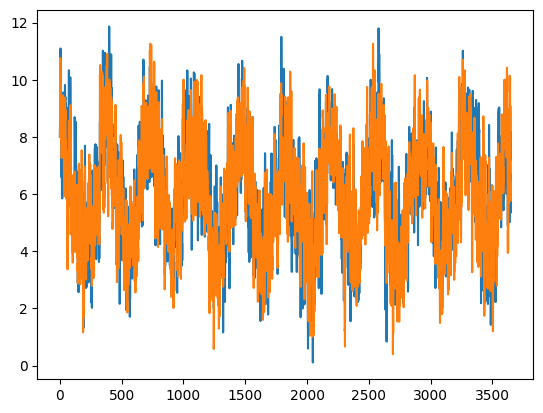

In [31]:
plt.plot(viento_molino1, label = 'Molino 1')
plt.plot(viento_molino2, label = 'Molino 2')
plt.show()

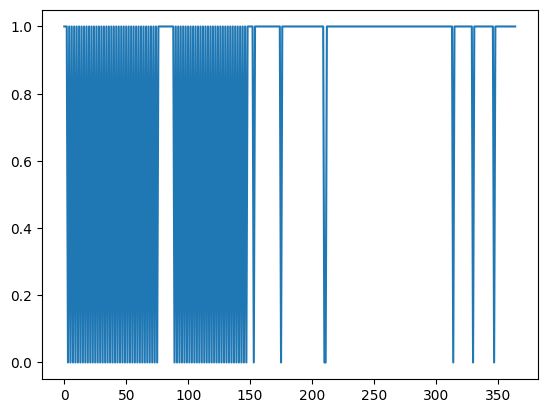

In [55]:
plt.plot(estado_molino, label = 'Molino 1')
#plt.plot(estado_molino2, label = 'Molino 2')

plt.show()

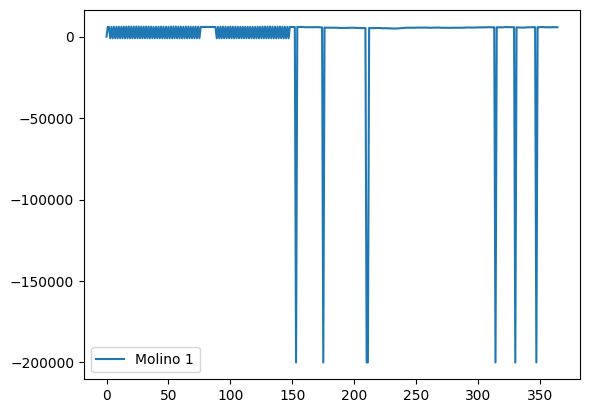

In [54]:
plt.plot(cashflow, label = 'Molino 1')
#plt.plot(cashflow2, label = 'Molino 2')
plt.legend()
plt.show()